#Importing Libraries

In [1]:
import numpy as np
from tqdm import tqdm
import pandas as pd
from scipy.spatial.distance import mahalanobis
from scipy.stats import mode
from sklearn.model_selection import StratifiedKFold
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.cm


In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#Data Pre-processing

In [3]:

col_names = ['px_{}'.format(i) for i in range (1024)]
df = pd.read_csv('/content/fea2.csv', names=col_names)
df.head()

,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_1014,px_1015,px_1016,px_1017,px_1018,px_1019,px_1020,px_1021,px_1022,px_1023
0,35,45,45,48,50,52,54,60,61,65,...,7,6,7,6,6,8,8,9,9,9
1,13,12,11,13,11,12,11,12,16,22,...,47,68,74,64,71,72,72,67,62,58
2,12,15,20,24,27,30,42,48,49,57,...,6,6,12,17,15,10,9,9,8,7
3,9,8,7,7,8,9,15,19,29,34,...,123,54,10,10,10,7,6,7,7,18
4,114,112,112,112,112,108,116,118,118,115,...,65,62,59,53,49,44,37,36,37,42


In [4]:
df=df.astype('uint8')

In [5]:
df.shape

(1700, 1024)

In [ ]:
arr = next(iter(df.iterrows()))[1].to_numpy()
arrn = arr/np.linalg.norm(arr)

In [ ]:
df.loc[0, :].to_numpy()

array([35, 45, 45, ...,  9,  9,  9], dtype=uint8)

In [25]:
df_norm_withoutY = df.copy()
for idx, val in tqdm(df.iterrows()):
  val = val.to_numpy()
  val_norm = np.divide(val, np.linalg.norm(val))
  df_norm_withoutY.loc[idx, :] = val_norm

df_norm = df_norm_withoutY.copy()
df_norm.head()

1700it [01:18, 21.69it/s]


,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_1014,px_1015,px_1016,px_1017,px_1018,px_1019,px_1020,px_1021,px_1022,px_1023
0,0.021796,0.028023,0.028023,0.029891,0.031137,0.032382,0.033628,0.037364,0.037987,0.040478,...,0.004359,0.003736,0.004359,0.003736,0.003736,0.004982,0.004982,0.005605,0.005605,0.005605
1,0.006237,0.005757,0.005277,0.006237,0.005277,0.005757,0.005277,0.005757,0.007676,0.010555,...,0.022549,0.032623,0.035502,0.030704,0.034063,0.034542,0.034542,0.032144,0.029745,0.027826
2,0.007085,0.008856,0.011808,0.014169,0.015941,0.017712,0.024796,0.028339,0.028929,0.033652,...,0.003542,0.003542,0.007085,0.010037,0.008856,0.005904,0.005314,0.005314,0.004723,0.004133
3,0.004458,0.003962,0.003467,0.003467,0.003962,0.004458,0.007430,0.009411,0.014364,0.016841,...,0.060923,0.026747,0.004953,0.004953,0.004953,0.003467,0.002972,0.003467,0.003467,0.008916
4,0.044881,0.044093,0.044093,0.044093,0.044093,0.042518,0.045668,0.046455,0.046455,0.045274,...,0.025590,0.024409,0.023228,0.020866,0.019291,0.017322,0.014567,0.014173,0.014567,0.016535


In [32]:
classes = [0]*170
classes.extend([1]*170)
classes.extend([2]*170)
classes.extend([3]*170)
classes.extend([4]*170)
classes.extend([5]*170)
classes.extend([6]*170)
classes.extend([7]*170)
classes.extend([8]*170)
classes.extend([9]*170)

df_norm['Y'] = classes

In [ ]:

dataset = np.empty((1700, 32, 32), dtype=np.uint8)
for idx, val in tqdm(df_norm.iterrows()):
  dataset[idx] = val.to_numpy().reshape(32,32)

In [ ]:
list_faces = []
list_classes = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9']
for chunk in np.array_split(df_norm, 10):
  list_faces.append(chunk)

ds_separated = dict(zip(list_classes, list_faces))

In [ ]:

seed = random.randint(1, 99999)

Folds = dict()
for keys, values in ds_separated.items():
  list_ = []
  testFold = values.sample(20, random_state=seed)
  indicesList = testFold.index.to_numpy()
  trainFold = values.loc[~values.index.isin(indicesList)]
  list_.append(trainFold)
  list_.append(testFold)
  Folds['Fold_{}'.format(keys[-1])] = list_

#Folds['Fold_k'][0] - train
#Folds['Fold_k'][1] - test

NameError: ignored

In [ ]:
class KNN:
  def __init__(self, df, fold, metric='Euclidean', k=5):
    X = df.drop(['Y'], axis=1)
    Y = df[['Y']]
    idx_train = fold[0]
    idx_test = fold[1]

    self.xtrain = X.loc[idx_train]
    self.ytrain = Y.loc[idx_train]
    self.xtest = X.loc[idx_test]
    self.ytest = Y.loc[idx_test]
    self.k = k
    self.metric = metric

  def CalculateDistance(self, sampleRow, testRow):
    if self.metric.lower() == 'euclidean':
      sampleRow = sampleRow.to_numpy() if not isinstance(sampleRow, type(np.array([]))) else sampleRow
      testRow = testRow.to_numpy() if not isinstance(testRow, type(np.array([]))) else testRow
      distance = np.sum(np.power(sampleRow-testRow, 2))
      dsitance = np.sqrt(distance)

    elif self.metric.lower() == 'mahalanobis':
      x = self.xtrain.to_numpy()
      mu = np.mean(x, axis=0)
      sigma = np.cov(x.transpose())
      sampleRow = sampleRow.to_numpy() if not isinstance(sampleRow, type(np.array([]))) else sampleRow
      distance = mahalanobis(sampleRow, mu, np.linalg.inv(sigma))

    elif self.metric.lower() == 'cosine':
      # cos_sim = dot(a, b)/(norm(a)*norm(b))
      sampleRow = sampleRow.to_numpy() if not isinstance(sampleRow, type(np.array([]))) else sampleRow
      testRow = testRow.to_numpy() if not isinstance(testRow, type(np.array([]))) else testRow
      numerator = np.dot(sampleRow, testRow)
      denominator = np.sqrt(sampleRow.dot(sampleRow)) * np.sqrt(testRow.dot(testRow))
      distance = np.divide(numerator, denominator)

    return distance

  def predict(self):
    y_pred = []

    for test_pt in self.xtest.to_numpy():
      distances = []
      for i in tqdm(range(len(self.xtrain))):
        dist = self.CalculateDistance(test_pt, self.xtrain.iloc[i])
        distances.append((dist, test_pt))

      distances_df = pd.DataFrame(data=distances, columns=['Distance', 'Data Point'], index = self.ytrain.index)
      k_neighbours = distances_df.sort_values(by='Distance', axis=0)[:self.k]
      labels = self.ytrain.loc[k_neighbours.index]
      prevalent = mode(labels).mode[0]
      y_pred.append(prevalent)

    return y_pred 



In [34]:
X= df_norm.drop(['Y'],  axis=1)
y = df_norm['Y']
skf = StratifiedKFold(n_splits=5)
fold1, fold2, fold3, fold4, fold5 = skf.split(X, y)
# X.iloc[next(iter(skf.split(X, y)))[0]]


In [ ]:
error1_cosine = []
# Calculating error for K values between 1 and 40
for i in range(1, 20):
    knn = KNN(df_norm, fold1, metric='cosine', k=i)
    pred_i = knn.predict()
    error.append(np.mean(knn.ytest.to_numpy().ravel() == np.array(pred_i).ravel()))
    clear_output(wait=True)

100%|██████████| 1360/1360 [00:00<00:00, 10187.35it/s]


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

NameError: ignored

<Figure size 1000x600 with 0 Axes>

#PCA Analysis

In [8]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
import plotly.express as px

In [9]:
df_pca_numpy = StandardScaler().fit_transform(df)

In [10]:
df_pca = pd.DataFrame(df_pca_numpy, columns=col_names)
df_pca_withY = df_pca.copy()
df_pca_withY['Y'] = classes
df_pca_withY.head()

,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_1015,px_1016,px_1017,px_1018,px_1019,px_1020,px_1021,px_1022,px_1023,Y
0,-0.184111,0.013727,-0.035028,-0.021013,-0.037972,-0.073820,-0.113900,-0.070600,-0.141086,-0.110222,...,-0.745263,-0.713189,-0.769161,-0.742867,-0.695405,-0.676486,-0.650535,-0.662186,-0.619572,0
1,-0.778939,-0.843841,-0.907341,-0.912788,-1.017178,-1.055782,-1.150514,-1.169817,-1.119875,-1.032527,...,0.347875,0.467546,0.315993,0.415521,0.439848,0.352189,0.280298,0.167526,0.123964,0
2,-0.805977,-0.765880,-0.676435,-0.632516,-0.615452,-0.613899,-0.403187,-0.345405,-0.402097,-0.281814,...,-0.745263,-0.625075,-0.563356,-0.582475,-0.659928,-0.660413,-0.650535,-0.677841,-0.649921,0
3,-0.887090,-0.947789,-1.009966,-1.065664,-1.092502,-1.129429,-1.054084,-1.009515,-0.837114,-0.775139,...,0.101037,-0.660320,-0.694323,-0.671582,-0.713143,-0.708632,-0.682632,-0.693496,-0.483004,0
4,1.951865,1.754851,1.683940,1.609661,1.518715,1.300926,1.380753,1.257620,1.098712,0.962225,...,0.242088,0.203203,0.110188,0.023451,-0.056825,-0.210368,-0.217216,-0.223847,-0.118823,0


In [57]:
# Performing PCA 
pca = PCA()
pca.fit_transform(df_pca)
PC_components = np.arange(pca.n_components_) + 1

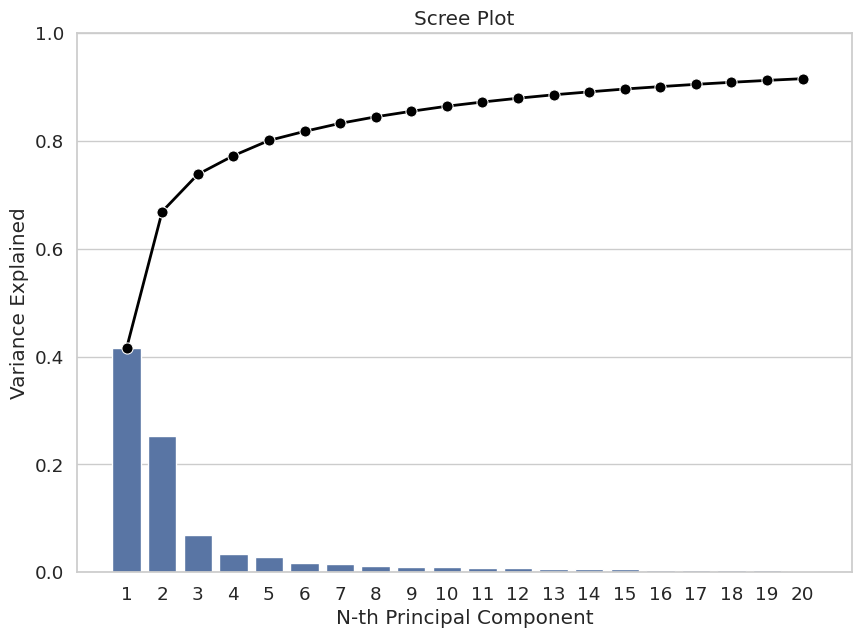

In [58]:
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=np.arange(20)+1, y=pca.explained_variance_ratio_[:20], color='b')
_ = sns.lineplot(x=np.arange(20), y=np.cumsum(pca.explained_variance_ratio_[:20]), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

##Transforming existing features
A good approximation would be for the components to explain atleast 95% of the variation in the data

In [59]:
variances = np.cumsum(pca.explained_variance_ratio_)
idx = np.where(variances > 0.95)[0][0]
idx

37

Since it is known from the scree plot that variances sum up to 90% after 20th components, therefore we will define a new object with restriction at 95% percent explained variance to get appropriately reduced features.

In [53]:
df_pca95_numpy = StandardScaler().fit_transform(df)
pca_95 = PCA(0.95)
pca_95.fit(df_pca95_numpy)
X_afterPCA = pca_95.transform(X)
X_afterPCA.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


(1700, 38)

<ipython-input-92-5a9cd8b8385a>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.matshow(np.cov(df_norm_withoutY.T), cmap=matplotlib.cm.get_cmap('BuPu'))


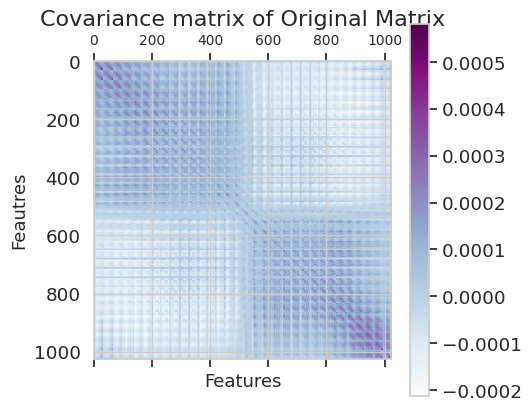

In [92]:
plt.matshow(np.cov(df_norm_withoutY.T), cmap=matplotlib.cm.get_cmap('BuPu'))
plt.colorbar( orientation="vertical")
plt.title('Covariance matrix of Original Matrix', fontsize=16)
plt.xlabel('Features', fontsize=13)
plt.ylabel('Feautres', fontsize=13)
plt.xticks(fontsize=10)
plt.show()

<ipython-input-93-eae109a8f334>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.matshow(np.cov(X_afterPCA.T), cmap=matplotlib.cm.get_cmap('BuPu'))


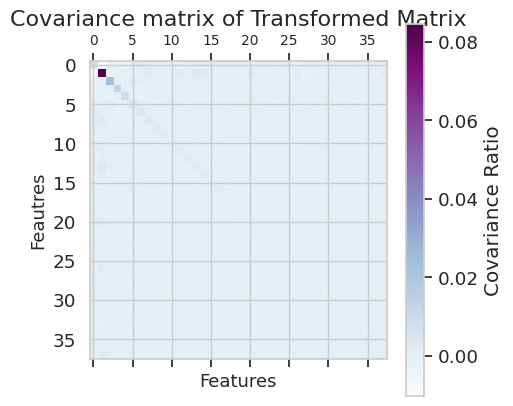

In [93]:
plt.matshow(np.cov(X_afterPCA.T), cmap=matplotlib.cm.get_cmap('BuPu'))
plt.colorbar(label="Covariance Ratio", orientation="vertical")
plt.title('Covariance matrix of Transformed Matrix', fontsize=16)
plt.xlabel('Features', fontsize=13)
plt.ylabel('Feautres', fontsize=13)
plt.xticks(fontsize=10)
plt.show()


Performing Inference on transformed data

In [ ]:
error2_cosine = []
# Calculating error for K values between 1 and 40
for i in range(1, 30):
    knn = KNN(df_norm, fold1, metric='cosine', k=i)
    pred_i = knn.predict()
    error.append(np.mean(knn.ytest.to_numpy().ravel() == np.array(pred_i).ravel()))
    clear_output(wait=True)

In [ ]:
#https://medium.com/swlh/image-classification-with-k-nearest-neighbours-51b3a289280
#https://towardsdatascience.com/normalise-numpy-unit-vector-f9f086134507